In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

In [2]:
#Make/fake some data
np.random.seed(1663)
n = 1000

salaries = np.random.normal(50000, 10000, n)
majors = ['Engineering', 'Computer Science', 'Sociology', 'Education'] 
school_types = ['Public', 'Private']
ages = np.random.randint(22, 65, n)
genders = ['Male', 'Female']

data = {
    'Major': np.random.choice(majors, size=n),
    'Salary': salaries,
    'School_Type': np.random.choice(school_types, size=n),
    'Age': ages,
    'Gender': np.random.choice(genders, size=n)
}

df = pd.DataFrame(data)

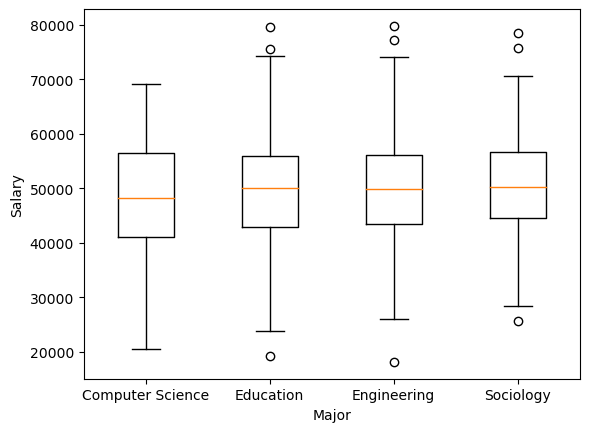

                        Salary        Age
Major                                    
Computer Science  48549.427763  42.902724
Education         49664.358629  42.992095
Engineering       50070.233473  42.920152
Sociology         50372.767963  42.894273


/var/folders/h6/pqj3gx255vd5dc6kqnfr7k3r0000gn/T/ipykernel_96677/1014247028.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_means = df.groupby('Major').mean()


In [3]:
#Box plots by factor (major)
major_grouped_salary = df.groupby('Major')['Salary'].apply(list)
categories = major_grouped_salary.index
values = major_grouped_salary.values
plt.boxplot(values, labels=categories)
plt.xlabel('Major')
plt.ylabel('Salary')
plt.show()

#Means by factor (major)
grouped_means = df.groupby('Major').mean()
print(grouped_means)

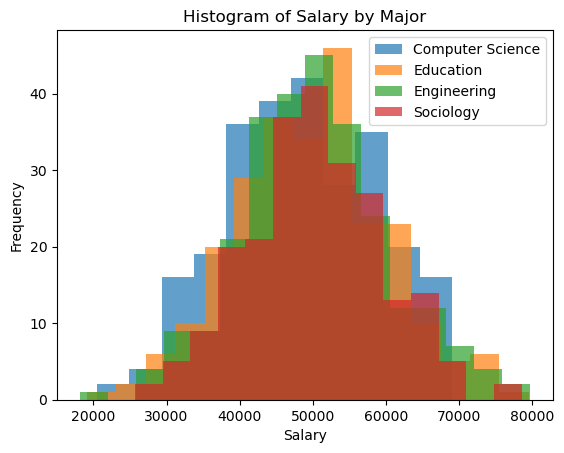

In [4]:
#ANOVA Assumption 1: Normally distributed data
grouped_data = df.groupby('Major')

#Plot histogram for each group
for group_name, group_data in grouped_data:
    plt.hist(group_data['Salary'], bins='auto', alpha=0.7, label=group_name)

plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Salary by Major')
plt.legend()

plt.show()

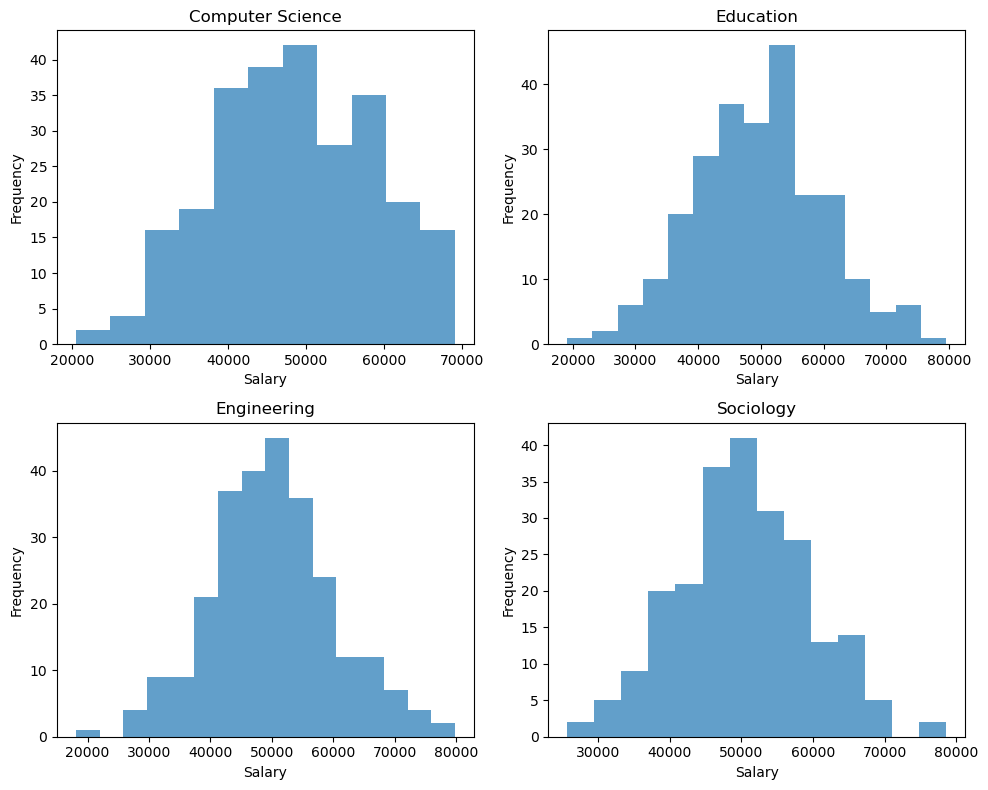

In [5]:
#ANOVA Assumption 1: Normally distributed data
grouped_data = df.groupby('Major')

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

#Flatten the subplots grid
axs = axs.flatten()

#Plot histogram for each group in a separate subplot
for i, (group_name, group_data) in enumerate(grouped_data):
    axs[i].hist(group_data['Salary'], bins='auto', alpha=0.7)
    axs[i].set_title(group_name)
    axs[i].set_xlabel('Salary')
    axs[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [6]:
#Shapiro-Wilk statistical test for normality assumption

grouped_data = df.groupby('Major')

#Perform Shapiro-Wilk test for each group
for group_name, group_data in grouped_data:
    salaries = group_data['Salary']
    shapiro_test = shapiro(salaries)
    test_statistic = shapiro_test.statistic
    p_value = shapiro_test.pvalue
    
    print(f"Shapiro-Wilk Test Results for {group_name}")
    print("Test Statistic:", test_statistic)
    print("p-value:", p_value)
    
#Null hypothesis: Data are normally distributed. If p is less than cutoff, reject the null of normally distributed data.

Shapiro-Wilk Test Results for Computer Science
Test Statistic: 0.989641547203064
p-value: 0.06354702264070511
Shapiro-Wilk Test Results for Education
Test Statistic: 0.9969353675842285
p-value: 0.9103366136550903
Shapiro-Wilk Test Results for Engineering
Test Statistic: 0.9947682023048401
p-value: 0.5073023438453674
Shapiro-Wilk Test Results for Sociology
Test Statistic: 0.9975646734237671
p-value: 0.9816165566444397


In [7]:
#Levene statistical test for homogeneous variance
levene_test = levene(df['Salary'][df['Major'] == 'Computer Science'],
                     df['Salary'][df['Major'] == 'Engineering'],
                     df['Salary'][df['Major'] == 'Education'],
                     df['Salary'][df['Major'] == 'Sociology'])

test_statistic = levene_test.statistic
p_value = levene_test.pvalue

print("Levene's Test Results:")
print("Test Statistic:", test_statistic)
print("p-value:", p_value)
#Null hypothesis: Variances are equal.  If p-value is less than cutoff, reject null that variances are equal

Levene's Test Results:
Test Statistic: 1.330581121381173
p-value: 0.263005464442492


In [8]:
#Perform one-way ANOVA with statsmodels
model = ols('Salary ~ Major', data=df).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

             df        sum_sq       mean_sq         F    PR(>F)
Major       3.0  4.763525e+08  1.587842e+08  1.581945  0.192105
Residual  996.0  9.997128e+10  1.003728e+08       NaN       NaN


In [9]:
#Alternatively, perform one-way ANOVA with scipy's f_oneway function
groups = []
for major, group in df.groupby('Major')['Salary']:
    groups.append(group)

f_stat, p_value = f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_value)

#The associated p-value indicates the probability of observing such an F-statistic under the null hypothesis (no group differences).
#If the p-value is below cutoff, we reject the null hypothesis and conclude that there are significant differences between the groups.

F-statistic: 1.5819447686925958
p-value: 0.192104834977605


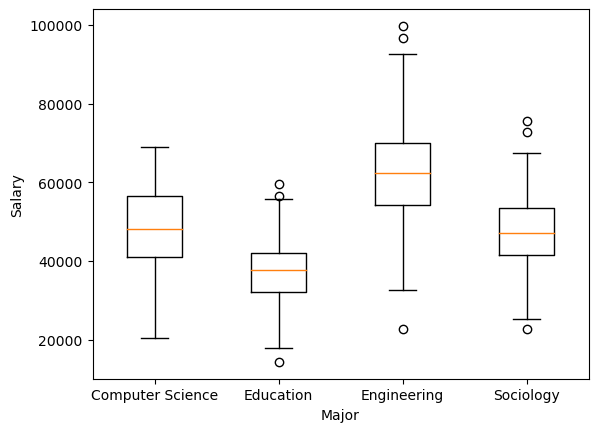

                        Salary        Age
Major                                    
Computer Science  48549.427763  42.902724
Education         37248.268972  42.992095
Engineering       62587.791841  42.920152
Sociology         47372.767963  42.894273


/var/folders/h6/pqj3gx255vd5dc6kqnfr7k3r0000gn/T/ipykernel_96677/2989778952.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_means = df.groupby('Major').mean()


In [10]:
#Create some differences!
df.loc[df['Major'] == 'Engineering', 'Salary'] *= 1.25
df.loc[df['Major'] == 'Education', 'Salary'] *= 0.75
df.loc[df['Major'] == 'Sociology', 'Salary'] -= 3000

major_grouped_salary = df.groupby('Major')['Salary'].apply(list)
categories = major_grouped_salary.index
values = major_grouped_salary.values
plt.boxplot(values, labels=categories)
plt.xlabel('Major')
plt.ylabel('Salary')
plt.show()

grouped_means = df.groupby('Major').mean()
print(grouped_means)

In [11]:
#Perform one-way ANOVA with statsmodels
model = ols('Salary ~ Major', data=df).fit()
anova_table = sm.stats.anova_lm(model)

print(anova_table)

             df        sum_sq       mean_sq           F         PR(>F)
Major       3.0  8.413726e+10  2.804575e+10  269.886839  3.598622e-128
Residual  996.0  1.035010e+11  1.039167e+08         NaN            NaN


In [12]:
#Perform one-way ANOVA with scipy's f_oneway function
groups = []
for major, group in df.groupby('Major')['Salary']:
    groups.append(group)

f_stat, p_value = f_oneway(*groups)

#Print the results
print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 269.8868388108792
p-value: 3.598621969282798e-128


In [13]:
#Two Way ANOVA
#Reset fake  data
np.random.seed(1663)
n = 1000

salaries = np.random.normal(50000, 10000, n)
majors = ['Engineering', 'Computer Science', 'Sociology', 'Education'] 
school_types = ['Public', 'Private']
ages = np.random.randint(22, 65, n)
genders = ['Male', 'Female']

data = {
    'Major': np.random.choice(majors, size=n),
    'Salary': salaries,
    'School_Type': np.random.choice(school_types, size=n),
    'Age': ages,
    'Gender': np.random.choice(genders, size=n)
}

df = pd.DataFrame(data)

In [14]:
#Means by Major
grouped_means = df.groupby('Major').mean()
print(grouped_means)

#Means by School Type
grouped_means = df.groupby('School_Type').mean()
print(grouped_means)

                        Salary        Age
Major                                    
Computer Science  48549.427763  42.902724
Education         49664.358629  42.992095
Engineering       50070.233473  42.920152
Sociology         50372.767963  42.894273
                   Salary        Age
School_Type                         
Private      48772.103755  42.270153
Public       50386.284243  43.486137


/var/folders/h6/pqj3gx255vd5dc6kqnfr7k3r0000gn/T/ipykernel_96677/2615616877.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_means = df.groupby('Major').mean()
/var/folders/h6/pqj3gx255vd5dc6kqnfr7k3r0000gn/T/ipykernel_96677/2615616877.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_means = df.groupby('School_Type').mean()


In [15]:
#Perform two-way ANOVA
formula = 'Salary ~ C(Major) + C(School_Type) + C(Major):C(Gender)'
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                          sum_sq     df         F    PR(>F)
C(Major)            4.456960e+08    3.0  1.490067  0.215669
C(School_Type)      5.889543e+08    1.0  5.907038  0.015257
C(Major):C(Gender)  5.484352e+08    4.0  1.375161  0.240525
Residual            9.880648e+10  991.0       NaN       NaN


In [16]:
#Create some differences and test again
df.loc[df['Major'] == 'Engineering', 'Salary'] *= 1.25
df.loc[df['Major'] == 'Education', 'Salary'] *= 0.75
df.loc[df['Major'] == 'Sociology', 'Salary'] -= 3000
df.loc[df['School_Type'] == 'Private', 'Salary'] += 6000

#Means by Major
grouped_means = df.groupby('Major').mean()
print(grouped_means)

#Means by School Type
grouped_means = df.groupby('School_Type').mean()
print(grouped_means)

formula = 'Salary ~ C(Major) + C(School_Type) + C(Major):C(School_Type)'
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                        Salary        Age
Major                                    
Computer Science  51350.984184  42.902724
Education         40307.557509  42.992095
Engineering       65165.738609  42.920152
Sociology         49936.644615  42.894273
                   Salary        Age
School_Type                         
Private      53771.696272  42.270153
Public       50255.109016  43.486137
                               sum_sq     df           F         PR(>F)
C(Major)                 8.316359e+10    3.0  267.260116  4.230992e-127
C(School_Type)           5.000826e+09    1.0   48.212972   6.904508e-12
C(Major):C(School_Type)  4.937333e+07    3.0    0.158669   9.241025e-01
Residual                 1.028939e+11  992.0         NaN            NaN


/var/folders/h6/pqj3gx255vd5dc6kqnfr7k3r0000gn/T/ipykernel_96677/1723063649.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_means = df.groupby('Major').mean()
/var/folders/h6/pqj3gx255vd5dc6kqnfr7k3r0000gn/T/ipykernel_96677/1723063649.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_means = df.groupby('School_Type').mean()
